필요한 내용 메모 및 코드 작업 진행하기
1) 기술통계, 회귀분석, 상관분석을 작업
2) 히토그램, 파이차트, 산정도, 히트맵 등으로 시각화

# 와인 품질 등급 예측하기
## 와인 속성을 분석해서 품질 등급 예측
### 데이터 수집, 레드와인, 화이트와인, 머신러닝 저장소 래포지토리 사이트 최근 확인 -> data가 not found -> 그래서 따로 다운받아 제공
### 탐색, 정보확인 info()함수 이용예정

### 기술 통계확인, describe() : 기본 평균, 분산, 편차, 최소, 최대 등 통계관련 데이터 간단히 요약
### unique() :  중복제거, value_counts() : 해당 데이터의 갯수를 집계

## 데이터 모델링 
### 1) 데이터 두 그룹으로 비교 분석, 
### 2) t-검정, 두 그룹을 비교하는 분석, 라이브러리를 이용할 예정. scipy 패키지의 ttest_ind()
### 3) 회귀분석, 라이브러리  statsmodels.formula.api , ols()

### 등급 예측 
### 샘플을 독립변수 (x) -> 회귀분석 모델 적용 -> 종속 변수(y) -> 품질 예측. 

# 용어 정리
## 기술통계 :  
- 데이터 특성을 나타내는 수치를 이용해 분석을 하는 기본적인 통계방법
- 요약통계라고도 함.
- 통계값으로 평균, 중앙값, 최빈값 등 대표적 표준편차, 사분위 값.

## 회귀분석
- 독립변수 x, 종속변수 y간의 서로 간의 연관성을 파악하기 위한 분석기법
- 하나의 변수가 다른 변수에 어떤 영향을 주냐, 인과관계를 분석시 많이 사용함
- 선형회귀 (직선을 이용한다)
- 수식 => y = b1 + b2x + b3x + ..... + bnx

## t-검정
- 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법
- 예) red wine, white wine의 1등급 2등급인지 유무에 따라

In [96]:
# 데이터 준비
# 파일 정리 간단히 하기
# 초기 데이터 세미콜론으로 구분이 되어 있어서 -> csv파일로 변경
# pandas 미설치 시 쥬피터 노트북코드로 설치 : !pip install pandas
# cmd 터미널 설치시 -> pip install pandas

import pandas as pd

# 레드와인을 csv 파일로 읽어서 -> 메모리 이동 -> csv 파일로 변경하기. 
# header = 0 , csv 파일의 첫번째 행에 열이름 포함. 
# engine = 'python' , 보통은 C 엔진을 사용하지만, 경우에 따라서, 또는 파싱의 형태의 
# 따라서, 파이썬 엔진을 사용하기도 함. 
red_df = pd.read_csv("/Users/minkyoungkim/WorkSpace/BITC/WorkSpace/11-BigdataTest/My_Python/1-통계분석/winequality-red.csv",
sep=';', header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
# index=False ,데이터프레임(DF로 표현 중) 행의 레이블을 csv에 쓰지 않음. 
red_df.to_csv("/Users/minkyoungkim/WorkSpace/BITC/WorkSpace/11-BigdataTest/My_Python/1-통계분석/winequality-red2.csv", index=False)

In [97]:
# 화이트와인을 csv 파일로 읽어서 -> 메모리 이동 -> csv 파일로 변경하기. 
white_df = pd.read_csv("/Users/minkyoungkim/WorkSpace/BITC/WorkSpace/11-BigdataTest/My_Python/1-통계분석/winequality-white.csv",
sep=';', header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
white_df.to_csv("/Users/minkyoungkim/WorkSpace/BITC/WorkSpace/11-BigdataTest/My_Python/1-통계분석/winequality-white2.csv", index=False)

# 용어

fixed acidity, (고정산)
volatile acidity,( 휘발산)
citric acid,(구연산)
residual sugar,(잔당)
chlorides,(염화물)
free sulfur dioxide,(유리 이산화황)
total sulfur dioxide,(총 이산화황)
density,(밀도)
pH,
sulphates,(황산염)
alcohol,(알코올)
위에 변수 :
독립 변수
======================
종속변수
quality, (품질)
=========================
데이터 전처리가 다 되어 있고, 
나열 할 때, 
독립 변수 순서  다음으로 종속 변수를 마지막에 표기한다. 

In [98]:
# 레드 와인, 화이트 와인의 샘플 데이터
# head() 상위 5개씩 추출해서 출력해보기. 
# 레드 와인, 
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [100]:
# 데이터 병합하기. 
# 레드 와인, 화이트 와인 합치기
# 레드 와인 csv 파일에 , 컬럼을 추가하기. 
# type 이라고, red , white 인지 분류를 위해서. 
# insert 특정 열 추가. 
red_df.insert(0, column="type", value="red")
red_df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
white_df.insert(0, column="type", value="white")
white_df.head()

# 각 행 열의 구조 
white_df.shape

(4898, 13)

In [102]:
# 레드 , 화이트 와인 타입 열 추가 후 병합(합치기)
wine = pd.concat([red_df,white_df])

In [103]:
#결과조회
wine.shape

(6497, 13)

In [104]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
# red, white 합친 메모리의 내용을 -> csv 파일로 쓰기. 
# csv 파일 형식으로 옮기기 
wine.to_csv("/Users/minkyoungkim/WorkSpace/BITC/WorkSpace/11-BigdataTest/My_Python/1-통계분석/wine.csv",
index=False)

In [106]:
# 합쳐진 데이터를 가지고 , 기본 통계 분석하기, 파이썬의 라이브러리 활용해보기. 
# 기본 정보 
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [107]:
wine.columns = wine.columns.str.replace(' ','_')

In [108]:
wine.head()

wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [109]:
# wine의 품직의 유니크 함수 이용해서 중복제거
# sorted 함수 이용해서 정렬

sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [110]:
# 데이터 모델링
# describe()함수를 이용해서 그룹비교해 보기
# red, white 두 그룹으로 나눠서 비교

wine.groupby("type")["quality"].describe() 

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [113]:
# 특정의 통계값을 조회 : 평균

wine.groupby("type")["quality"].mean() 

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [114]:
wine.groupby("type")["quality"].agg(["mean","std","min","max"]) 

,mean,std,min,max
type,,,,
red,5.636023,0.807569,3,8
white,5.877909,0.885639,3,9


In [119]:
# 기술통계 : 요약통계, 통계 값들을 가지고 기본적인 분석
# t-검정, 회귀분석 : 파이썬에서 제공하는 함수 사용
# t-검정 그룹간의 차이를 확인 -> scipy패키지 이용
# 회귀분석 -> statsmodels 라이브러리 사용

from scipy import stats
from statsmodels.formula.api import ols, glm

red_wine_quality = wine.loc[wine["type"] == "red", "quality"]

white_wine_quality = wine.loc[wine["type"] == "white", "quality"]

# t-검정 분석 하기. 
stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var = False)

Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"


# 위에서 정의한, 종속 변수(quality), 나머지 변수 독립 변수를 정리 
# 회귀 분석 함수 수행. 
# ols -> OLS(Ordinary Least Squares)
regression_result = ols(Rformula, data = wine).fit()

# 회귀 분석 요약을 출력. 
regression_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:36:37   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# 만든 회귀분석 모델을 활용해서 예측해 보기 : "quality", "type" 제외
sample1 = wine[wine.columns.difference(["quality", "type"])]
#wine
#sample1
#sample1.shape
sample1_2 = sample1[0:5][:]
#sample1_2

sample1_predict = regression_result.predict(sample1_2)
# 지도학습, 답이 있는 평가 분석 방법. 
print(f"sample1_predict앞에 만든 회귀분석 모델을 이용해서 quality 예측값 : {sample1_predict}")
#print(f"회귀분석 하기 전에 원래의 quality값 : {sample1_2}")

#print(f"회귀분석 하기 전에 원래의 quality값 : {wine.head()}")
print(f"회귀분석 하기 전에 원래의 quality값 : {wine[0:5]["quality"]}")




sample1_predict앞에 만든 회귀분석 모델을 이용해서 quality 예측값 : 0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64
회귀분석 하기 전에 원래의 quality값 : 0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [133]:
# 자료의 값이 아니라 임의로 우리가 독립 변수 값을 설정해서 모델을 이용해 품질의 결과값 예측 해보기. 

#Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

#임의의 데이터 만들기, 독립 변수에 예시값 넣어보고 모델로 예측 다시 해 보기
data = {"fixed_acidity":[8.2, 8], "volatile_acidity":[0.7, 0.5], "citric_acid":[0.2, 0.3], "residual_sugar":[6.0, 5.7], "chlorides":[0.045, 0.04], "free_sulfur_dioxide":[29.0, 30.0], "total_sulfur_dioxide":[97.0, 98.0], "density":[0.955, 0.92], "pH":[3.12, 3.01], "sulphates":[0.3, 0.25], "alcohol":[8.9, 8.8]}

#딕셔너리 - > pd를 이용해서 표로 만들기(DataFrame=DF)
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.9,0.045,0.2,0.955,8.2,29.0,3.12,6.0,0.30,97.0,0.7
1,8.8,0.040,0.3,0.920,8.0,30.0,3.01,5.7,0.25,98.0,0.5


In [134]:
# 임의의 수치로 만든 data를 회귀모델에 인자값으로 넣어서, 결괏값 예측해보기. 
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    7.022545
1    9.066865
dtype: float64

In [135]:
# 분석된 데이터를 가지고 시각화
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.5 MB/s eta 0:00:00a 0:00:01


/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_4142/2655334186.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde=True, color="red", label="red wine")
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_4142/2655334186.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

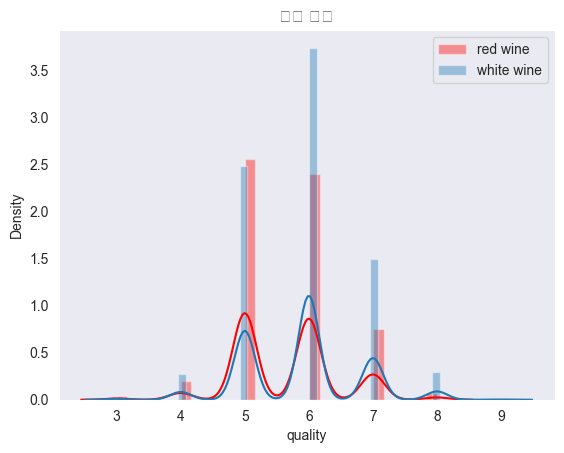

In [136]:
# 시각화에 필요한 패키지 임포트 하기. 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
# red wine 속성 설정. 
sns.distplot(red_wine_quality, kde=True, color="red", label="red wine")
# white wine 속성 설정. 
sns.distplot(white_wine_quality, kde=True, label="white wine")

plt.title("와인 타입")
plt.legend()
plt.show()

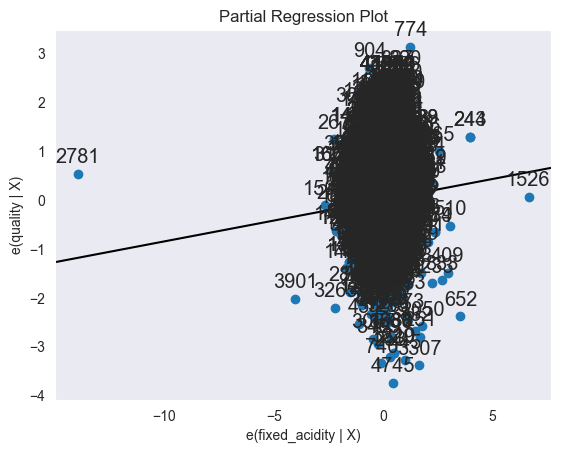

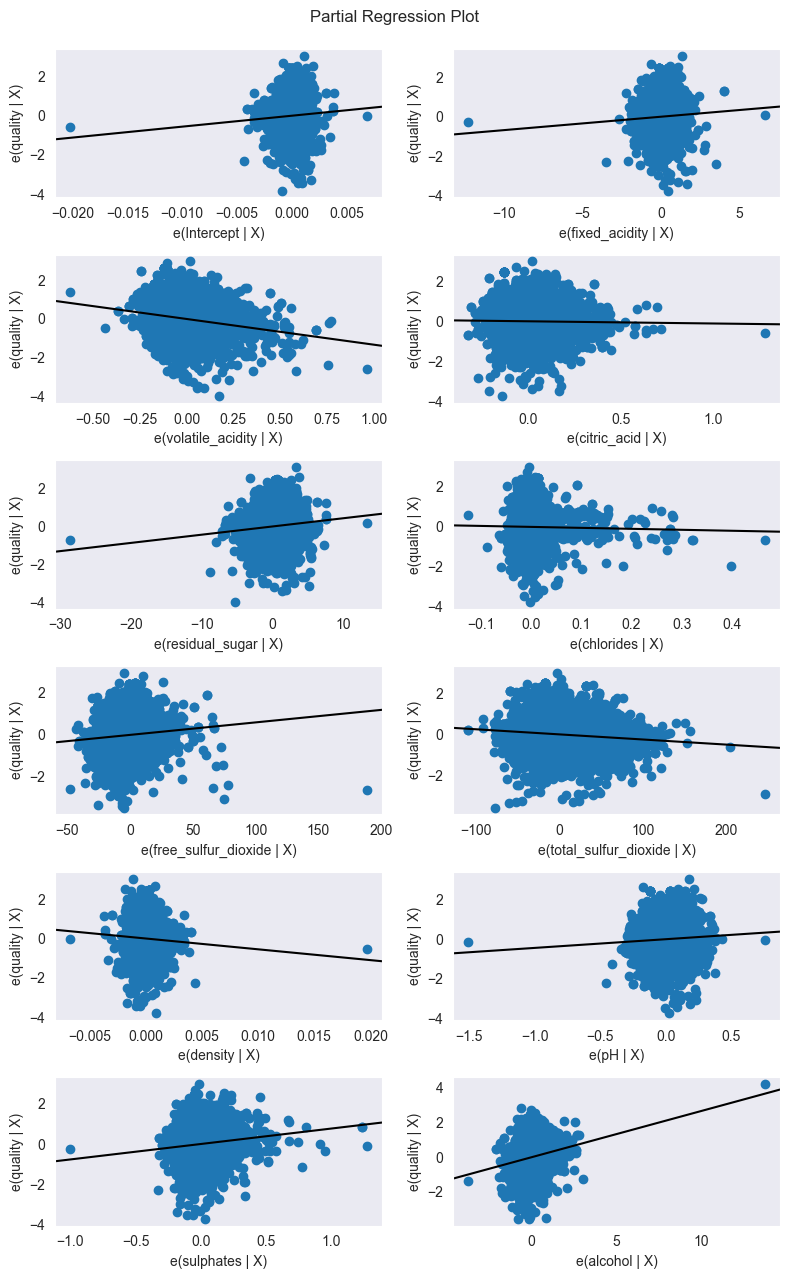

In [137]:
# 실제로 궁금했던 부분이, 어느 독립요소가, 실제 quality에 종속변수에 영향이 있는지 여부가 궁금했음. 
# 표에 답은 다 나와있었음 , 상관계수의 값으로 표기가 되었지만, 
# 시각화를 하는 이유가, 인사이트 결과를 좀더 쉽고 알아보기 편하게 하는게 주 목적. 
import statsmodels.api as sm
# wine 컬럼들에서, 종속변수 quality, 독립변수 중 하나인 fixed_acidity , 빼고 , 나머지를 필터 
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

# quality, fixed_acidity 두개의 상관 계수를 , 서로에게 영향이 있는지 여부이고, 
# 독립 변수 가 클수록 , 종속 변수 quality 가 ,증가 ?,. 감소? 확인, 수직선(상수, 관계없음. )
sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords=True)
plt.show()
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

In [ ]:
# 결론
## 데이터 수집 : 전처리가 다 되어 있음
## 독립변수 x1, x2, x3.... xn, y(종속변수) 이 컬럼의 순서대로 데이터가 전처리가 되어 있음

## 데이터 정리 :  cleaning, null, 이상치, 결측치, 등 값의 유무등

## 데이터 분석 : t-검정, 선형회귀(파이썬의 함수를 이용). 답이 있는 내용을 가지고 모델을 학습하고 예측

## 데이터 시각화 : 히스토그램, 산점도 등으로 시각화 했음

## 시각화를 통해서.., -> 얻고 싶은 결과 : 와인의 품질은 알코올의 영향을 많이 받는다. 정량적으로 분석, 도출

### 상관분석, 기술통계, 요약통계, 가장 기본적인 분석의 뼈대